<a href="https://colab.research.google.com/github/Nimisha-30/ArtificialIntelligence/blob/main/ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.javatpoint.com/artificial-intelligence-ai

#Uninformed/Blind Search Algorithms

##Depth First Search

[5, 2, 1, 3]


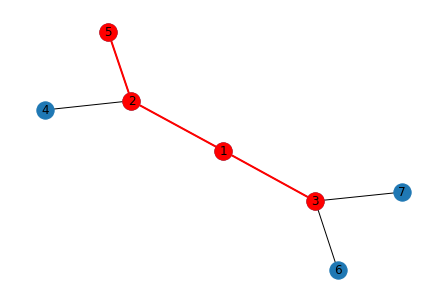

In [76]:
import networkx as nx

def dfs(graph, start, goal):
    stack = [(start, [start])]
    while stack:
        (vertex, path) = stack.pop()
        set1=set(graph[vertex])
        set2=set1-set(path)
        for next_node in set2:
            if next_node == goal:
                return path + [next_node]
            else:
                stack.append((next_node, path + [next_node]))
    return None

G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7)])
path = dfs(G, 5, 3)
print(path)

# Visualization of the path
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
path_nodes = path
nx.draw_networkx_nodes(G, pos, nodelist=path_nodes, node_color='r')
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)


##Breadth First Search

[1, 3, 7]


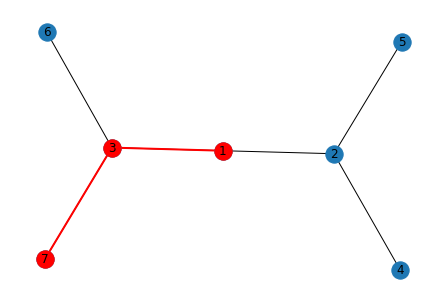

In [75]:
import networkx as nx

def bfs(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        set1=set(graph[vertex])
        set2=set1-set(path)
        for next_node in set2:
            if next_node == goal:
                return path + [next_node]
            else:
                queue.append((next_node, path + [next_node]))
    return None

G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7)])
path = bfs(G, 1, 7)
print(path)

# Visualization of the path
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
path_nodes = path
nx.draw_networkx_nodes(G, pos, nodelist=path_nodes, node_color='r')
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)


##Depth Limited Search

[2, 1, 3, 7]


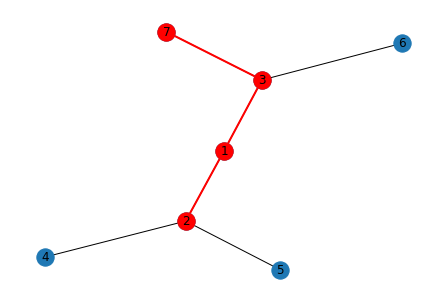

In [ ]:
import networkx as nx

def depth_limited_search(graph, start, goal, limit):
    if start == goal:
        return [start]
    if limit <= 0:
        return None
    for next_node in graph[start]:
        path = depth_limited_search(graph, next_node, goal, limit-1)
        if path is not None:
            return [start] + path
    return None

G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7)])
path = depth_limited_search(G, 2, 7, 3)
print(path)

# Visualization of the path
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
path_nodes = path
nx.draw_networkx_nodes(G, pos, nodelist=path_nodes, node_color='r')
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)


##Iterative Deepening Depth First Search

[1, 3, 7]


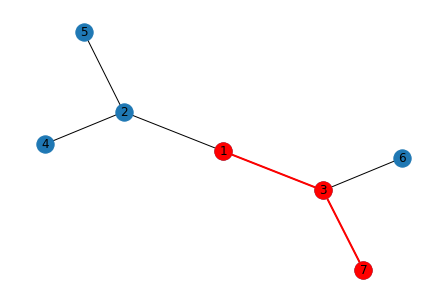

In [ ]:
import networkx as nx

def iddfs(graph, start, goal):
    for depth in range(0, len(graph)):
        path = dls(graph, start, goal, depth)
        if path is not None:
            return path
    return None

def dls(graph, start, goal, depth):
    if start == goal:
        return [start]
    if depth <= 0:
        return None
    for next_node in graph[start]:
        path = dls(graph, next_node, goal, depth-1)
        if path is not None:
            return [start] + path
    return None

G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7)])
path = iddfs(G, 1, 7)
print(path)

# Visualization of the path
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
path_nodes = path
nx.draw_networkx_nodes(G, pos, nodelist=path_nodes, node_color='r')
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)


##Uniform Cost Search

[1, 3, 7]


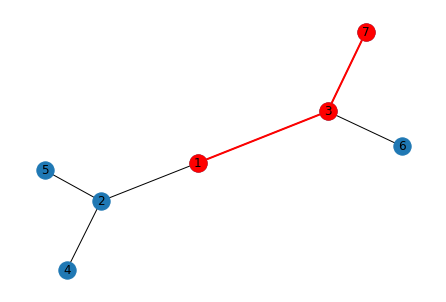

In [ ]:
import heapq
import networkx as nx

def uniform_cost_search(graph, start, goal):
    frontier = []
    heapq.heappush(frontier, (0, start))
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0
    while frontier:
        current = heapq.heappop(frontier)[1]
        if current == goal:
            break
        for next_node in graph[current].keys():
            new_cost = cost_so_far[current] + graph[current][next_node]['weight']
            if next_node not in cost_so_far or new_cost < cost_so_far[next_node]:
                cost_so_far[next_node] = new_cost
                priority = new_cost
                heapq.heappush(frontier, (priority, next_node))
                came_from[next_node] = current
    return came_from, cost_so_far

def construct_path(came_from, start, goal):
    current = goal
    path = [current]
    while current != start:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path

G = nx.Graph()
G.add_edges_from([(1, 2, {'weight': 2}), (1, 3, {'weight': 1}), (2, 4, {'weight': 3}), (2, 5, {'weight': 4}), (3, 6, {'weight': 2}), (3, 7, {'weight': 2})])
came_from, cost_so_far = uniform_cost_search(G, 1, 7)
path = construct_path(came_from, 1, 7)
print(path)

# Visualization of the path
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
path_nodes = path
nx.draw_networkx_nodes(G, pos, nodelist=path_nodes, node_color='r')
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)


##Bidirectional Search

[1, 2, 1, 3, 7]


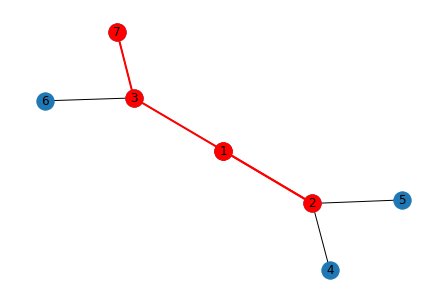

In [73]:
import networkx as nx

def bidirectional_search(graph, start, goal):
    queue_start = [(start, [start])]
    queue_goal = [(goal, [goal])]
    while queue_start and queue_goal:
        (vertex_start, path_start) = queue_start.pop(0)
        (vertex_goal, path_goal) = queue_goal.pop(0)

        set1=set(graph[vertex_start])
        set2=set1 - set(path_start)

        for next_node in set2:
            if next_node in path_goal:
                path_start.append(next_node)
                path_goal.append(next_node)
                path_goal.reverse()
                return path_start + path_goal[1:]
            else:
                queue_start.append((next_node, path_start + [next_node]))

        set3=set(graph[vertex_goal])
        set4=set3-set(path_goal)

        for next_node in set4:
            if next_node in path_start:
                path_start.append(next_node)
                path_goal.append(next_node)
                path_goal.reverse()
                return path_start + path_goal[1:]
            else:
                queue_goal.append((next_node, path_goal + [next_node]))
    return None

G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7)])
path = bidirectional_search(G, 1, 7)
print(path)

# Visualization of the path
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
path_nodes = path
nx.draw_networkx_nodes(G, pos, nodelist=path_nodes, node_color='r')
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)


#Informed/Heuristic based Search Algorithms

##Pure Heuristic Search

###Best First Search Algorithm

[1, 3, 7]


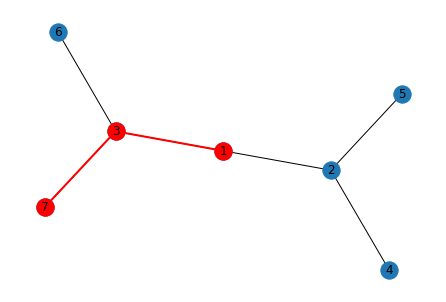

In [78]:
import networkx as nx

def best_first_search(graph, start, goal, heuristic):
    queue = [(start, [start], 0)]
    while queue:
        (vertex, path, cost) = min(queue, key=lambda x: heuristic(x[0], goal))
        queue.remove((vertex, path, cost))
        for next_node in graph[vertex]:
            if next_node == goal:
                return path + [next_node]
            else:
                new_cost = cost + 1
                queue.append((next_node, path + [next_node], new_cost))
    return None

def manhattan_distance(a, b):
    x1, y1 = a, a
    x2, y2 = b, b
    return abs(x1 - x2) + abs(y1 - y2)

G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7)])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

path = best_first_search(G, 1, 7, manhattan_distance)
print(path)

# Visualization of the path
path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
path_nodes = path
nx.draw_networkx_nodes(G, pos, nodelist=path_nodes, node_color='r')
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)


###A* Search Algorithm

[1, 3, 7]


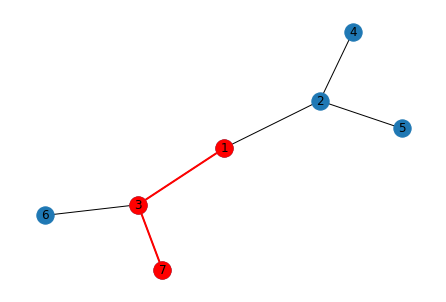

In [80]:
import networkx as nx
import heapq

def astar(graph, start, goal, heuristic):
    heap = [(0, start, [])]
    visited = set()
    while heap:
        (f, vertex, path) = heapq.heappop(heap)
        if vertex in visited:
            continue
        visited.add(vertex)
        path = path + [vertex]
        if vertex == goal:
            return path
        for neighbor in graph[vertex]:
            g = len(path)
            h = heuristic(neighbor, goal)
            f = g + h
            heapq.heappush(heap, (f, neighbor, path))
    return None

def manhattan_distance(a, b):
    x1, y1 = a, a
    x2, y2 = b, b
    return abs(x1 - x2) + abs(y1 - y2)

G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7)])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

path = astar(G, 1, 7, manhattan_distance)
print(path)

# Visualization of the path
path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
path_nodes = path
nx.draw_networkx_nodes(G, pos, nodelist=path_nodes, node_color='r')
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)


##Hill Climbing Search Algorithm

#Adversarial Search Algorithm

##Minimax Algorithm

##Alpha Beta Pruning